             Dataset     Split         Diagnosis  Cases
0           Dataset1  Training  meningioma_tumor    822
1           Dataset1  Training   pituitary_tumor    827
2           Dataset1  Training      glioma_tumor    826
3           Dataset1  Training          no_tumor    395
4           Dataset1   Testing  meningioma_tumor    115
5           Dataset1   Testing   pituitary_tumor     74
6           Dataset1   Testing      glioma_tumor    100
7           Dataset1   Testing          no_tumor    105
8           Dataset2  Training  meningioma_tumor   1339
9           Dataset2  Training   pituitary_tumor   1457
10          Dataset2  Training      glioma_tumor   1321
11          Dataset2  Training          no_tumor   1595
12          Dataset2   Testing  meningioma_tumor    306
13          Dataset2   Testing   pituitary_tumor    300
14          Dataset2   Testing      glioma_tumor    300
15          Dataset2   Testing          no_tumor    405
16  Dataset2 cleaned  Training  meningioma_tumor

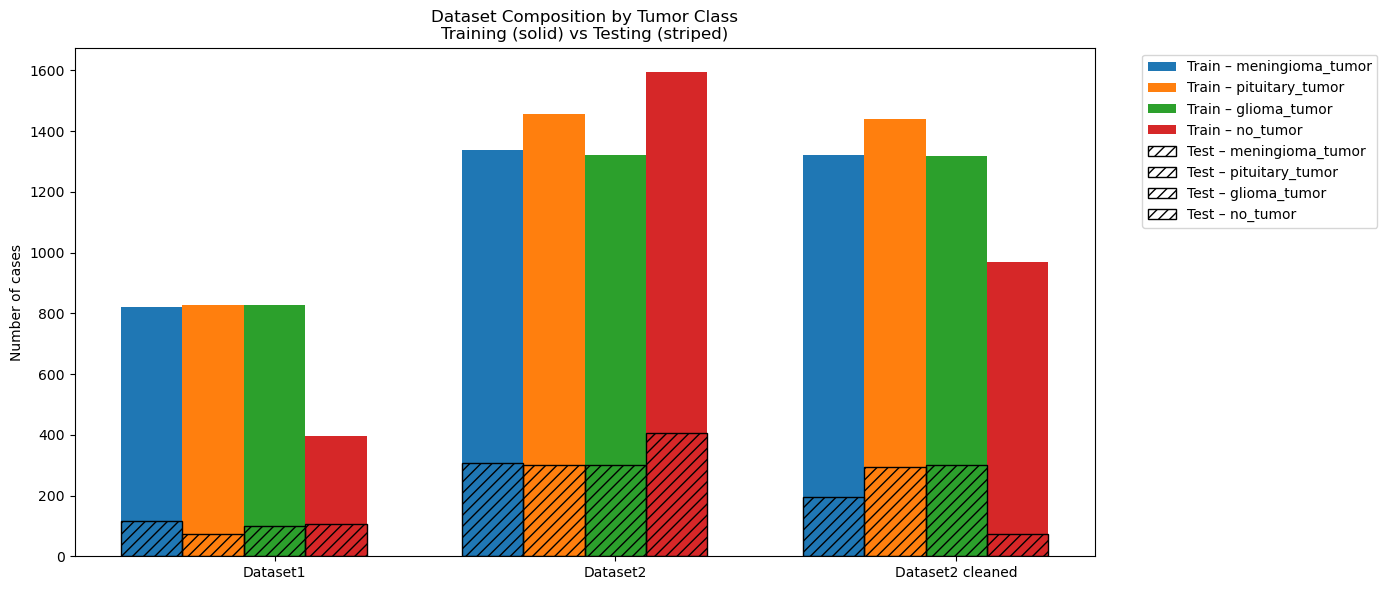

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------
# USER INPUT: 3 dataset root folders
# -------------------------------------------------------------------
paths = {
    "Dataset1": "/home/jovyan/nnunet2-mig-7g-80gb-datavol-1/data/Brain-Tumor-Classification",
    "Dataset2": "/home/jovyan/nnunet2-mig-7g-80gb-datavol-1/data2",
    "Dataset2 cleaned": "/home/jovyan/nnunet2-mig-7g-80gb-datavol-1/data2_clean",
}

diagnoses = ["meningioma_tumor", "pituitary_tumor", "glioma_tumor", "no_tumor"]


# -------------------------------------------------------------------
# Count cases in folder
# -------------------------------------------------------------------
def count_cases(folder):
    counts = {}
    for diag in diagnoses:
        class_path = os.path.join(folder, diag)
        if os.path.isdir(class_path):
            n = sum(1 for f in os.listdir(class_path)
                    if os.path.isfile(os.path.join(class_path, f)))
        else:
            n = 0
        counts[diag] = n
    return counts


# -------------------------------------------------------------------
# Build dataframe
# -------------------------------------------------------------------
records = []

for dataset_name, dataset_path in paths.items():
    for split in ["Training", "Testing"]:
        split_path = os.path.join(dataset_path, split)
        if not os.path.isdir(split_path):
            print(f"Warning: path not found: {split_path}")
            continue
        
        counts = count_cases(split_path)
        for diag, n in counts.items():
            records.append({
                "Dataset": dataset_name,
                "Split": split,
                "Diagnosis": diag,
                "Cases": n
            })

df = pd.DataFrame(records)
print(df)


# -------------------------------------------------------------------
# Plot: side-by-side tumor classes grouped by dataset
# -------------------------------------------------------------------
plt.figure(figsize=(14, 6))

datasets = list(paths.keys())
n_datasets = len(datasets)
n_classes = len(diagnoses)
width = 0.18  # width of each bar
x = np.arange(n_datasets)  # one group per dataset

# Training bars
for i, diag in enumerate(diagnoses):
    diag_df = df[(df["Diagnosis"] == diag) & (df["Split"] == "Training")]
    values = diag_df.set_index("Dataset").loc[datasets]["Cases"]
    plt.bar(x + (i - n_classes/2)*width, values, width,
            label=f"Train – {diag}")

# Testing bars (striped)
for i, diag in enumerate(diagnoses):
    diag_df = df[(df["Diagnosis"] == diag) & (df["Split"] == "Testing")]
    values = diag_df.set_index("Dataset").loc[datasets]["Cases"]
    plt.bar(x + (i - n_classes/2)*width, values, width,
            label=f"Test – {diag}", edgecolor="black", color="none", hatch="///")

plt.xticks(x, datasets)
plt.ylabel("Number of cases")
plt.title("Dataset Composition by Tumor Class\nTraining (solid) vs Testing (striped)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()

# -------------------------------------------------------------------
# Save figure
# -------------------------------------------------------------------
output_file = "dataset_distribution.png"
plt.savefig(output_file, dpi=300)
print(f"Plot saved to: {output_file}")
#plt.close()